In [2]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt

## Data: biochemistry graduate students

For a sample of 915 biochemistry graduate students we now how many papers they produced during the last 3 years of their PhD prodram. 

How do we estimate the average number of papers with uncertainty?

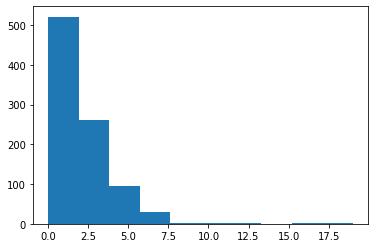

In [3]:
bio_papers = loadtxt("bioChemists.txt")
plt.hist(bio_papers)
plt.show()

## Estimating the mean
Simple point estimate of the mean:

In [4]:
bio_papers.mean()

1.692896174863388

Asymptotic confidence interval:

In [5]:
from statsmodels.stats.weightstats import DescrStatsW 
print("95% confidence interval:", DescrStatsW(bio_papers).tconfint_mean())

95% confidence interval: (1.5679321925466905, 1.8178601571800854)


Another way to calculate it:

In [6]:
from statsmodels.stats.weightstats import _tconfint_generic
n = len(bio_papers)
print("95% confidence interval:", _tconfint_generic(bio_papers.mean(), 
                                                    bio_papers.std(ddof=1) / np.sqrt(n),
                                                    dof=n-1,
                                                    alpha=0.05,
                                                    alternative = 'two-sided'))

95% confidence interval: (1.5679321925466905, 1.8178601571800854)


Yet another way, without any external libraries:

In [8]:
mean = bio_papers.mean()
std = bio_papers.std(ddof=1)
n = len(bio_papers)
alpha = 0.05
CI = (mean - sc.stats.t.ppf(1 - alpha / 2.0, n-1) * std / np.sqrt(n),
      mean + sc.stats.t.ppf(1 - alpha / 2.0, n-1) * std / np.sqrt(n))
        
print("95% confidence interval:", CI)

95% confidence interval: (1.5679321925466905, 1.8178601571800854)


### Data: Failure times of CPU (Homework)

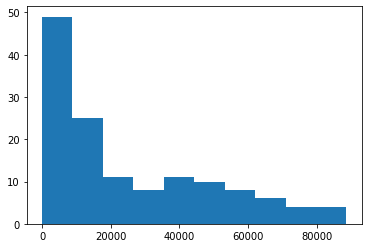

In [27]:
data = loadtxt("failure_times.txt")
plt.hist(data)
plt.show()

In [34]:
sample_mean = data.mean()
sample_std = data.std(ddof=1)
n = len(data)
alpha = 0.05
CI = (sample_mean - sc.stats.t.ppf(1 - alpha / 2.0, n-1) * sample_std / np.sqrt(n),
      sample_mean + sc.stats.t.ppf(1 - alpha / 2.0, n-1) * sample_std / np.sqrt(n))
        
print("95% confidence interval:", CI)

95% confidence interval: (20733.754590174318, 28765.5836451198)
